# **1. Import Libraries/Dataset**

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
#importing breast cancer dataset and loading it
from sklearn import datasets 
breast_cancer = datasets.load_breast_cancer()


In [57]:
# For easy of manipulation, converting the dataset to pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)

In [58]:
# Appending dataframe containing tumor features with diagnostic outcomes.
data['Diagnosis'] = breast_cancer.target


In [32]:
#lets have a quick glimpse of dataset
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
data.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

In [36]:
# Viewing the data statistics
data.describe(include ="all")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# **2. Data Visualisation and Augmentation**

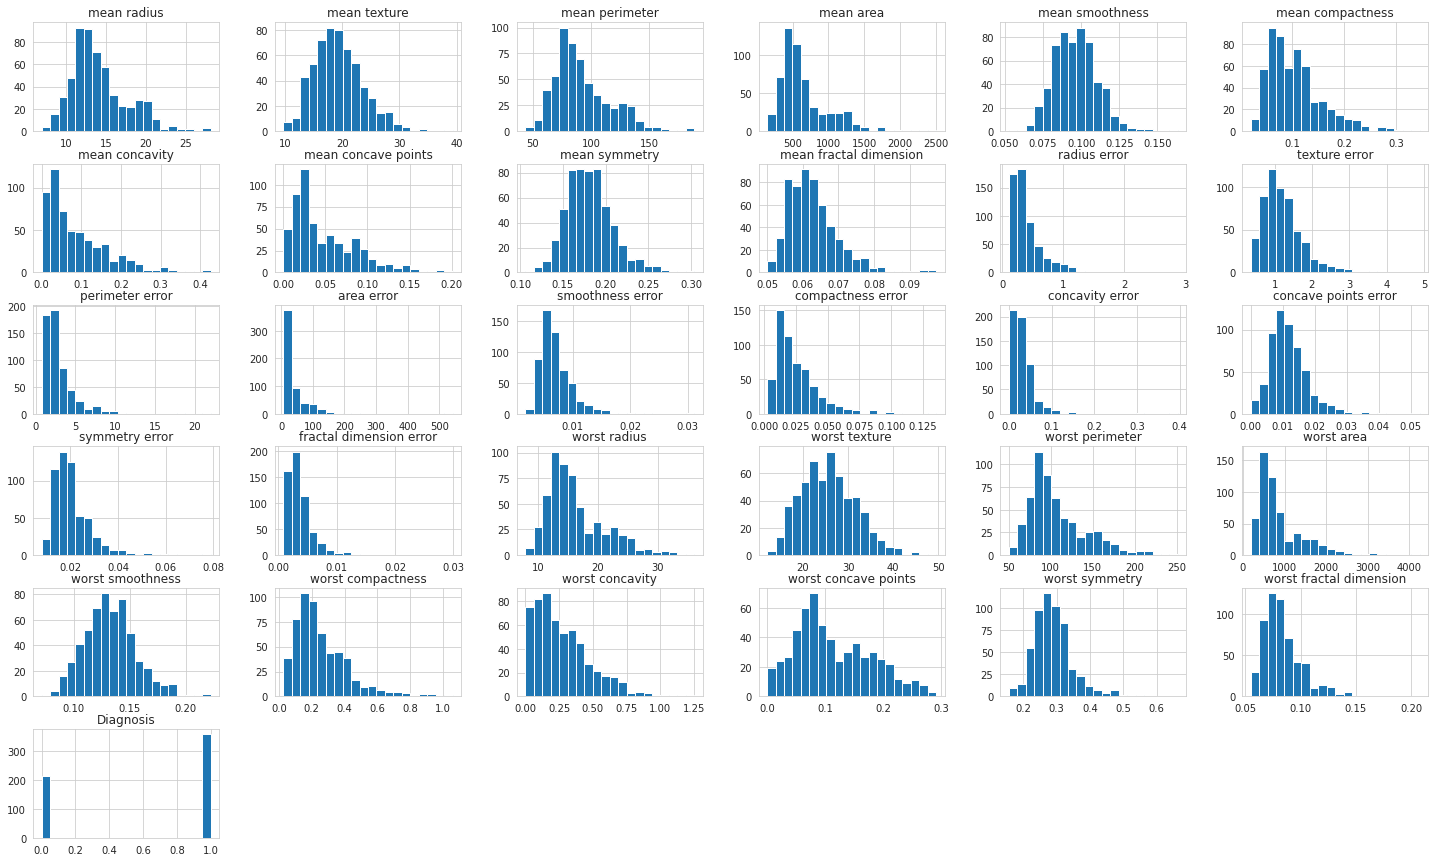

In [38]:
data.hist(bins=20,figsize=(25,15));

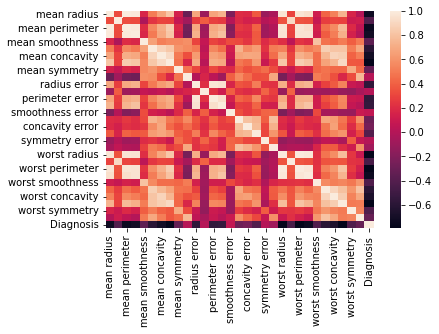

In [37]:
# Plotting the heatmap of correlation between features
sns.heatmap(data.corr())
sns.set_style("whitegrid")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


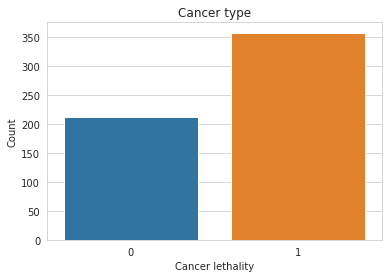

In [40]:
plt.title('Cancer type')
sns.countplot(data['Diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

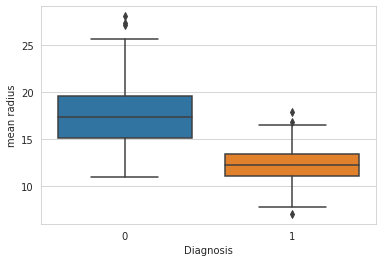

In [43]:
sns.boxplot(x="Diagnosis", y="mean radius", data=data)


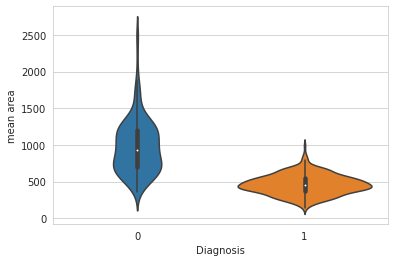

In [45]:
sns.violinplot(x="Diagnosis", y="mean area", data=data)

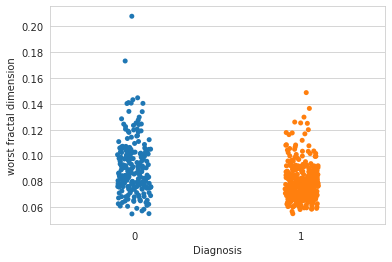

In [47]:
sns.stripplot(x="Diagnosis", y="worst fractal dimension", data=data, jitter=True)

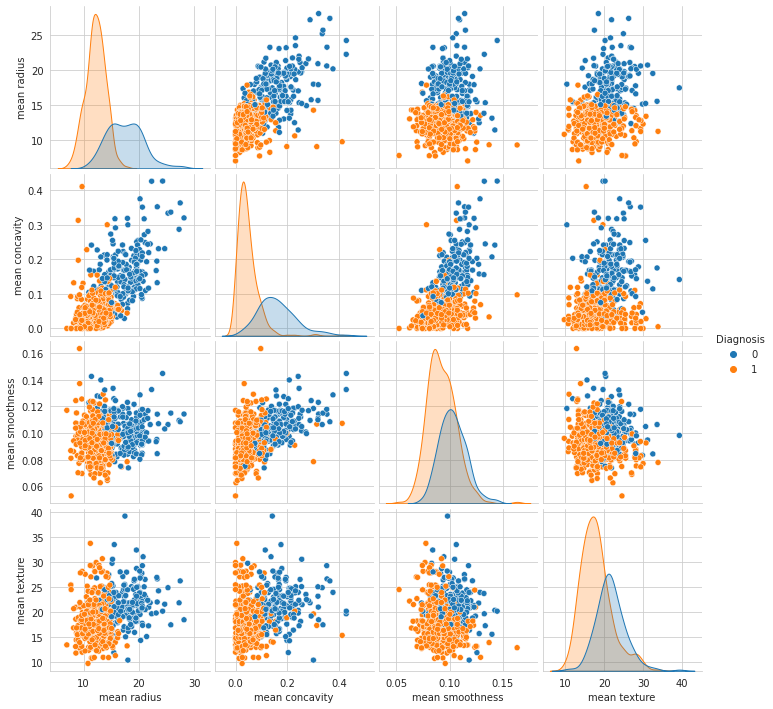

In [48]:
# Plotting bivariate relations between each pair of features with hue = "Diagnosis"
sns.pairplot(data, hue="Diagnosis", vars = ["mean radius", "mean concavity", "mean smoothness", "mean texture"])

# **3.Data Preprocessing**

In [50]:
#checking for nul values
print(data.isnull().values.any())

False


In [59]:
# Creating the independent factor only inorder to predict the dependent factor using unsupervised learning algorithm
x = data.drop('Diagnosis', axis=1).values

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# **4.Building a K-Means Clustering Model**

WE have to cluster our dataset using K-Means Algorithm. In order to do this I am going to use SKLearn library.

**Using Elbow method to find the number of clusters**

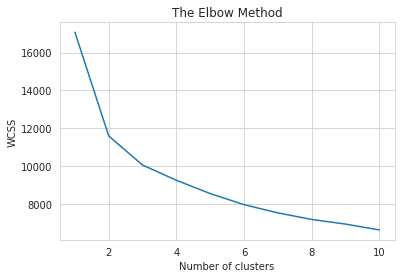

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this graph we can clearly see the elbow junction point is at 2.
Also, we already know that our dataset has only two classes .so lets fix th enumber of clusters to be 2.


In [65]:
km = KMeans(n_clusters=2, init="k-means++", n_init=10)

In [66]:
#predicting using K-Means
km_pred = km.fit_predict(x)

Text(0.5, 1.0, 'KMeans clustering plot')

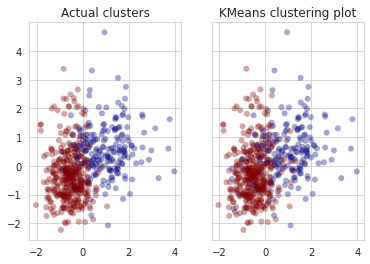

In [67]:
#using scatter plots for vizualization
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(x[:,0], x[:,1], c=data["Diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(x[:,0], x[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

In [70]:
# Calculating Silhoutte score
from sklearn.metrics import silhouette_score
score = silhouette_score(x, km.labels_, metric='euclidean')

# Printing the score

print('Silhouetter Score is : %.4f' % score)

Silhouetter Score is : 0.3450


# **Alternatively, we can use the below code to find the number of clusters using Silhouette and to fit the model using K-Means Clustering**

In [79]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(x).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(x,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3433822406907781
Silhouette score for k(clusters) = 3 is 0.31438400986080983
Silhouette score for k(clusters) = 4 is 0.27934377715730174
Silhouette score for k(clusters) = 5 is 0.16805360108904624
Silhouette score for k(clusters) = 6 is 0.14757274688766459
Silhouette score for k(clusters) = 7 is 0.15128775759095522
Silhouette score for k(clusters) = 8 is 0.13503464982910143
Silhouette score for k(clusters) = 9 is 0.11928329799412427
Silhouette score for k(clusters) = 10 is 0.12316253146589036
Silhouette score for k(clusters) = 11 is 0.1342639249045815
Silhouette score for k(clusters) = 12 is 0.12931733247723115


From the above code, we can observe that Silhouette Score is maximum when k=2, Hence 2 Clusters is the right option

# **5.Conclusion**

Finally, we build a K-Means Clustering model using 2 clusters for breast cancer dataset and also vizualized them